In [1]:
using Symbolics
using LinearAlgebra


In [2]:
@variables a11 a22 a33 a12 a13 a23 ϕ β 
a = [a11 a12 a13;
     a12 a22 a23;
     a13 a23 a33]

3×3 Matrix{Num}:
 a11  a12  a13
 a12  a22  a23
 a13  a23  a33

In [3]:
#define the Kronecker Delta Function
δ(i, j) = ifelse(isequal(i, j), 1, 0)


δ (generic function with 1 method)

In [4]:
b = Array{Num}(undef, 3, 3, 3, 3)
tr_a = a[1,1] + a[2,2] + a[3,3]

for i in 1:3, j in 1:3, k in 1:3, l in 1:3
    term1 = -(1//35) * tr_a * (δ(i,j)*δ(k,l) + δ(i,k)*δ(j,l) + δ(i,l)*δ(j,k))
    term2 = (1//7) * (
        δ(i,j)*a[k,l] + δ(i,k)*a[j,l] + δ(i,l)*a[j,k] +
        δ(j,k)*a[i,l] + δ(j,l)*a[i,k] + δ(k,l)*a[i,j]
    )
    b[i,j,k,l] = term1 + term2
end


In [5]:
ϵ_dot = Num(1//2)
L = [ϵ_dot 0 0;
     0 ϵ_dot 0;
     0 0  -2*ϵ_dot]

E = 1//2 * (L + transpose(L))
E_e = [ϵ_dot 0 0;
       0 ϵ_dot 0;
       0 0 0]
E_c = [0 0 0;
       0 0 0;
       0 0 -2*ϵ_dot]

3×3 Matrix{Num}:
 0  0      0
 0  0      0
 0  0  -1//1

In [6]:
#define a function that contracts a second rank tensor X with a four rank tensor B and calculate the (k,l) entry
function contract(X, B, k, l)
    s = zero(a11) #same type as entry of a
    for i in 1:3, j in 1:3
        s += X[i,j] * B[i,j,k,l]
    end
    return s
end

contract (generic function with 1 method)

In [7]:
function steady_state_eqn(k, l)
    term1 = (L * a + a * transpose(L))[k, l]
    term2 = 2 * contract(L, b, k, l)
    term3 = contract(E_e, b, k, l)
    term4 = (ϕ // 15) * (2 * E_c[k, l] + tr(E_c) * δ(k, l))
    return term1 - term2 - β * (term3 + term4)
end



steady_state_eqn (generic function with 1 method)

In [8]:
eqs = [
  steady_state_eqn(1,1) ~ 0,
  steady_state_eqn(1,2) ~ 0,
  steady_state_eqn(1,3) ~ 0,
  steady_state_eqn(2,2) ~ 0,
  steady_state_eqn(2,3) ~ 0,
  steady_state_eqn(3,3) ~ 0
]


6-element Vector{Equation}:
 a11 - 2((1//2)*((6//7)*a11 - (3//35)*(a11 + a22 + a33)) + (1//2)*(-(1//35)*(a11 + a22 + a33) + (1//7)*(a11 + a22)) - (1//7)*(a11 + a33) + (1//35)*(a11 + a22 + a33)) - ((1//2)*((6//7)*a11 - (3//35)*(a11 + a22 + a33)) + (1//2)*(-(1//35)*(a11 + a22 + a33) + (1//7)*(a11 + a22)) - (1//15)*ϕ)*β ~ 0
 (3//7)*a12 - (3//7)*a12*β ~ 0
 -(3//14)*a13 - (2//7)*a13*β ~ 0
 -2((1//2)*(-(1//35)*(a11 + a22 + a33) + (1//7)*(a11 + a22)) + (1//2)*(-(3//35)*(a11 + a22 + a33) + (6//7)*a22) + (1//35)*(a11 + a22 + a33) - (1//7)*(a22 + a33)) + a22 - ((1//2)*(-(1//35)*(a11 + a22 + a33) + (1//7)*(a11 + a22)) + (1//2)*(-(3//35)*(a11 + a22 + a33) + (6//7)*a22) - (1//15)*ϕ)*β ~ 0
 -(3//14)*a23 - (2//7)*a23*β ~ 0
 -2((1//2)*(-(1//35)*(a11 + a22 + a33) + (1//7)*(a22 + a33)) + (1//2)*((1//7)*(a11 + a33) - (1//35)*(a11 + a22 + a33)) + (3//35)*(a11 + a22 + a33) - (6//7)*a33) - (2//1)*a33 - ((1//2)*(-(1//35)*(a11 + a22 + a33) + (1//7)*(a22 + a33)) + (1//2)*((1//7)*(a11 + a33) - (1//35)*(a11 + a2

In [9]:
using Symbolics: symbolic_linear_solve
vars = [a11 a22 a33 a12 a13 a23]

sol = symbolic_linear_solve(eqs, vars)


6-element Vector{Any}:
   ((-((3//35) + (1//70)*β)*(((-1//15)*β*((3//35) + (1//70)*β)*ϕ) / (-(12//35) + (31//70)*β) + (-(-(12//35) + (-(-(12//35) - (2//35)*β)*((3//35) + (1//70)*β)) / (-(12//35) + (31//70)*β) - (2//35)*β)*((-((9//35) + (-((3//35) + (1//70)*β)*((9//35) + (3//70)*β)) / (-(12//35) + (31//70)*β) + (3//70)*β)*(((-1//15)*β*((3//35) + (1//70)*β)*ϕ) / (-(12//35) + (31//70)*β) + (1//15)*β*ϕ)) / (-(12//35) + (-(((3//35) + (1//70)*β)^2)) / (-(12//35) + (31//70)*β) + (31//70)*β) + ((-1//15)*β*((9//35) + (3//70)*β)*ϕ) / (-(12//35) + (31//70)*β) + (1//5)*β*ϕ)) / ((24//35) + (-(-(12//35) + (-(-(12//35) - (2//35)*β)*((3//35) + (1//70)*β)) / (-(12//35) + (31//70)*β) - (2//35)*β)*((9//35) + (-((3//35) + (1//70)*β)*((9//35) + (3//70)*β)) / (-(12//35) + (31//70)*β) + (3//70)*β)) / (-(12//35) + (-(((3//35) + (1//70)*β)^2)) / (-(12//35) + (31//70)*β) + (31//70)*β) + (-(-(12//35) - (2//35)*β)*((9//35) + (3//70)*β)) / (-(12//35) + (31//70)*β) + (4//35)*β) + (1//15)*β*ϕ)) / (-(12//35) + (-(((3

In [10]:
using Symbolics: substitute


# 初始化一个 3×3 的解矩阵
a_sol = zeros(Num, 3, 3)

# 将求解结果 sol 依次填入对应位置
a_sol[1,1] = sol[1]
a_sol[2,2] = sol[2]
a_sol[3,3] = sol[3]
a_sol[1,2] = sol[4]
a_sol[1,3] = sol[5]
a_sol[2,3] = sol[6]

# 对称性赋值
a_sol[2,1] = a_sol[1,2]
a_sol[3,1] = a_sol[1,3]
a_sol[3,2] = a_sol[2,3]


b_sol = Array{Num}(undef, 3, 3, 3, 3)
tr_a = a_sol[1,1] + a_sol[2,2] + a_sol[3,3]
for i in 1:3, j in 1:3, k in 1:3, l in 1:3
    term1 = -(1//35) * tr_a * (δ(i,j)*δ(k,l) + δ(i,k)*δ(j,l) + δ(i,l)*δ(j,k))
    term2 = (1//7) * (
        δ(i,j)*a_sol[k,l] + δ(i,k)*a_sol[j,l] + δ(i,l)*a_sol[j,k] +
        δ(j,k)*a_sol[i,l] + δ(j,l)*a_sol[i,k] + δ(k,l)*a_sol[i,j]
    )
    b_sol[i,j,k,l] = term1 + term2
end


ξ = -sum(a_sol[i,j] * E_c[i,j] for i in 1:3, j in 1:3) / sqrt(sum(E_c[i,j]^2 for i in 1:3, j in 1:3))




-((((1//15)*β*((9//35) + (3//70)*β)*ϕ) / (-(12//35) + (31//70)*β) + (((9//35) + (-((3//35) + (1//70)*β)*((9//35) + (3//70)*β)) / (-(12//35) + (31//70)*β) + (3//70)*β)*(((-1//15)*β*((3//35) + (1//70)*β)*ϕ) / (-(12//35) + (31//70)*β) + (1//15)*β*ϕ)) / (-(12//35) + (-(((3//35) + (1//70)*β)^2)) / (-(12//35) + (31//70)*β) + (31//70)*β) - (1//5)*β*ϕ) / ((24//35) + (-(-(12//35) + (-(-(12//35) - (2//35)*β)*((3//35) + (1//70)*β)) / (-(12//35) + (31//70)*β) - (2//35)*β)*((9//35) + (-((3//35) + (1//70)*β)*((9//35) + (3//70)*β)) / (-(12//35) + (31//70)*β) + (3//70)*β)) / (-(12//35) + (-(((3//35) + (1//70)*β)^2)) / (-(12//35) + (31//70)*β) + (31//70)*β) + (-(-(12//35) - (2//35)*β)*((9//35) + (3//70)*β)) / (-(12//35) + (31//70)*β) + (4//35)*β))

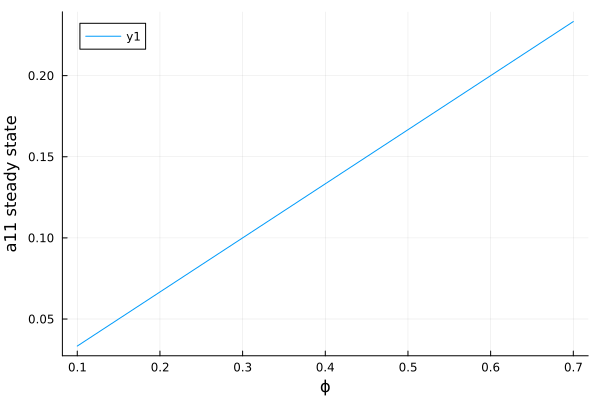

In [11]:
using Symbolics

f_expr_a11 = a_sol[1,1] 
params = [ϕ, β]

f_sym = build_function(f_expr_a11, params, expression=Val{false})  # 返回匿名函数表达式
f = eval(f_sym)  # 编译成实际可调用的函数

using Plots

ϕ_vals = [i//100 for i in 10:70]
y_vals = [f(ϕ, 5) for ϕ in ϕ_vals]

plot(ϕ_vals, y_vals, xlabel="ϕ", ylabel="a11 steady state")


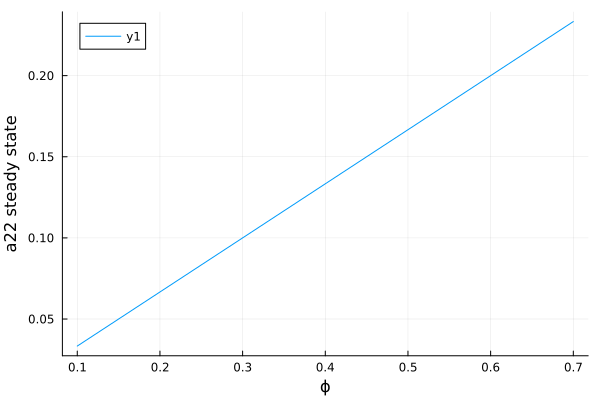

In [12]:
f_expr_a22 = a_sol[2,2] 
params = [ϕ, β]

f_sym = build_function(f_expr_a22, params, expression=Val{false})  # 返回匿名函数表达式
f = eval(f_sym)  # 编译成实际可调用的函数

using Plots

ϕ_vals = [i//100 for i in 10:70]
y_vals = [f(ϕ, 5) for ϕ in ϕ_vals]

plot(ϕ_vals, y_vals, xlabel="ϕ", ylabel="a22 steady state")

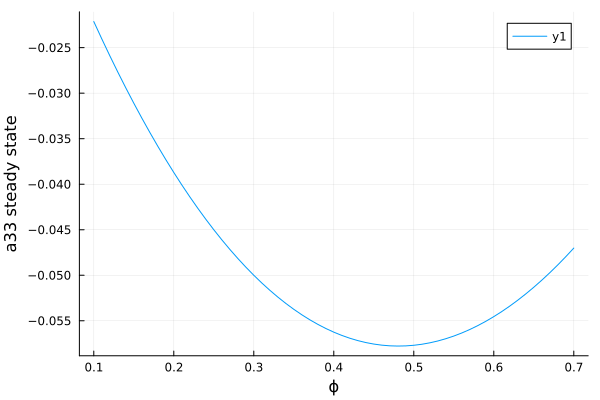

In [13]:
f_expr_a33 = a_sol[3,3] 
params = [ϕ, β]

f_sym = build_function(f_expr_a33, params, expression=Val{false})  # 返回匿名函数表达式
f = eval(f_sym)  # 编译成实际可调用的函数

using Plots

ϕ_vals = [i//100 for i in 10:70]
y_vals = [f(ϕ, 5) for ϕ in ϕ_vals]

plot(ϕ_vals, y_vals, xlabel="ϕ", ylabel="a33 steady state")

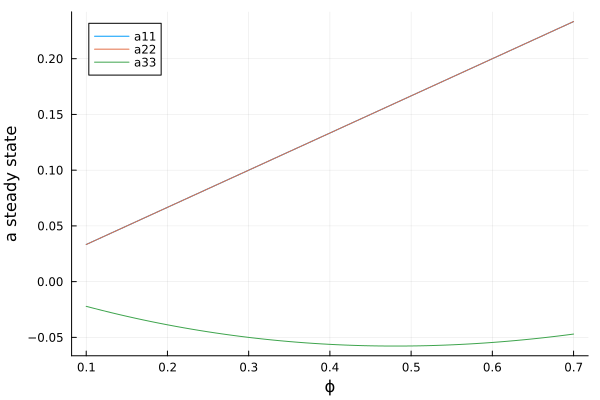

In [14]:
using Symbolics, Plots

# 提取表达式
f_expr_a11 = a_sol[1, 1]
f_expr_a22 = a_sol[2, 2]
f_expr_a33 = a_sol[3, 3]
params = [ϕ, β]

# 构建数值函数
f_sym_11 = build_function(f_expr_a11, params, expression = Val(false))
f_sym_22 = build_function(f_expr_a22, params, expression = Val(false))
f_sym_33 = build_function(f_expr_a33, params, expression = Val(false))
f11 = eval(f_sym_11)
f22 = eval(f_sym_22)
f33 = eval(f_sym_33)

# 定义 φ 取值范围
ϕ_vals = [i // 100 for i in 10:70]

# 计算对应值（固定 β = 5）
y11 = [f11(ϕ, 5) for ϕ in ϕ_vals]
y22 = [f22(ϕ, 5) for ϕ in ϕ_vals]
y33 = [f33(ϕ, 5) for ϕ in ϕ_vals]

# 绘图
plot(ϕ_vals, y11, label = "a11", xlabel = "ϕ", ylabel = "a steady state")
plot!(ϕ_vals, y22, label = "a22")
plot!(ϕ_vals, y33, label = "a33")


## Enter the Numerical Framework for Calculating $\Sigma$

In [15]:
#substitute the values of parameter ϕ and β to make a_sol into a matrix in Float 64
using Symbolics

params = Dict(ϕ => 56//100, β => 5)

a_num = substitute.(a_sol, Ref(params))             # 仍然是符号类型 Num
a_eval = Symbolics.value.(a_num)                 # 把 Num 转换为 Base 表达式
a_val = Float64.(a_eval)                            # 最后才转换为浮点数
a_val = 0.5 * (a_val + a_val')
a_val ./= tr(a_val)


3×3 Matrix{Float64}:
 0.275  0.0    0.0
 0.0    0.275  0.0
 0.0    0.0    0.45

In [16]:
δ(i,j) = i == j ? 1.0 : 0.0

function compute_b(a::AbstractMatrix)
    b = zeros(Float64, 3, 3, 3, 3)
    tr_a = tr(a)

    for i in 1:3, j in 1:3, k in 1:3, l in 1:3
        b[i,j,k,l] = -(1/35)*tr_a*(δ(i,j)*δ(k,l) + δ(i,k)*δ(j,l) + δ(i,l)*δ(j,k)) +
                      (1/7)*(δ(i,j)*a[k,l] + δ(i,k)*a[j,l] + δ(i,l)*a[j,k] +
                             δ(j,k)*a[i,l] + δ(j,l)*a[i,k] + δ(k,l)*a[i,j])
    end
    return b
end

b_val = compute_b(a_val)

L = [0.5 0.0 0.0;
     0.0 0.5 0.0;
     0.0 0.0 -1.0]

E = 0.5 * (L + L')

E_e = [0.5 0.0 0.0;
       0.0 0.5 0.0;
       0.0 0.0 0.0]

E_c = [0.0 0.0 0.0;
       0.0 0.0 0.0;
       0.0 0.0 -1.0]



3×3 Matrix{Float64}:
 0.0  0.0   0.0
 0.0  0.0   0.0
 0.0  0.0  -1.0

In [29]:
function double_contract(A::AbstractMatrix, B::AbstractMatrix)
    return sum(A .* B)
end

norm_Ec = sqrt(double_contract(E_c, E_c))
ξ = -double_contract(a_val, E_c)/norm_Ec

function tensor_contraction(A::AbstractMatrix, b::Array{Float64,4})
    Σ = zeros(3, 3)
    for i in 1:3, j in 1:3, k in 1:3, l in 1:3
        Σ[k, l] += A[i, j] * b[i, j, k, l]
    end
    return Σ
end

#now explicitly define the calculation of Σ
function compute_sigma_tensor(E, E_c, b, ϕ, ϕ_J, ξ, ξ_J, α_0, χ_0, μ)
    A = (α_0 * E) / (1 - ϕ/ϕ_J)^2 + (χ_0 * E_c) / (1 - ξ/ξ_J)^2
    Σ = μ * tensor_contraction(A, b)
    return Σ
end



ϕ = 0.56
ϕ1_J = 0.644
ϕ2_J = 0.578
ξ1_J = 0.88
ξ2_J = 0.78
α_0 = 2.3
χ_0 = 2.4
β_0 = 6.9
μ = 1.0
Π_star = 5 # for simplicity


function iterate_Sigma(ϕ)

    tol=1e-6
    maxiter=100
    Σ = nothing  #initializing the global variable but with no value
    f = 0.5
    
    for iter in 1:maxiter
        ϕ_J = ϕ1_J * (1 - f) + ϕ2_J * f
        ξ_J = ξ1_J * (1 - f) + ξ2_J * f

        Σ = compute_sigma_tensor(E, E_c, b_val, ϕ, ϕ_J, ξ, ξ_J, α_0, χ_0, μ)
        Π = -tr(Σ)/3
        f_new = exp(-Π_star / Π)

        if abs(f_new - f) < tol
            break
        end
    
        f = f_new
    end

    return Σ
end

iterate_Sigma (generic function with 1 method)

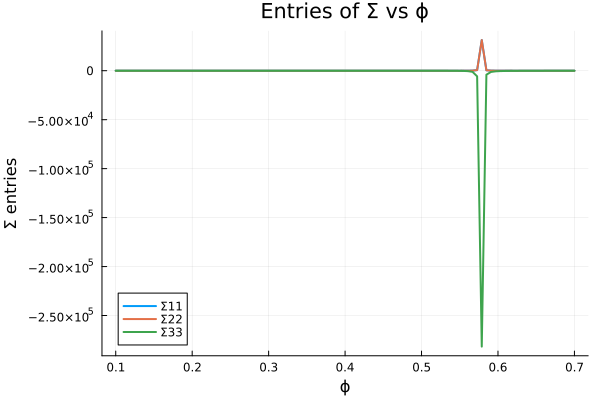

In [30]:
using Plots

# Step 1: 创建 phi 值范围（更密集）
ϕ_vals = range(0.1, 0.7, length=100)

# Step 2: 初始化结果存储向量
Σ11_vals = Float64[]
Σ22_vals = Float64[]
Σ33_vals = Float64[]

# Step 3: 计算每个 phi 下的 Σ 并提取 entry
for ϕ in ϕ_vals
    Σ = iterate_Sigma(ϕ)
    push!(Σ11_vals, Σ[1,1])
    push!(Σ22_vals, Σ[2,2])
    push!(Σ33_vals, Σ[3,3])
end

# Step 4: 画图
plot(ϕ_vals, Σ11_vals, label="Σ11", lw=2)
plot!(ϕ_vals, Σ22_vals, label="Σ22", lw=2)
plot!(ϕ_vals, Σ33_vals, label="Σ33", lw=2)
xlabel!("ϕ")
ylabel!("Σ entries")
title!("Entries of Σ vs ϕ")


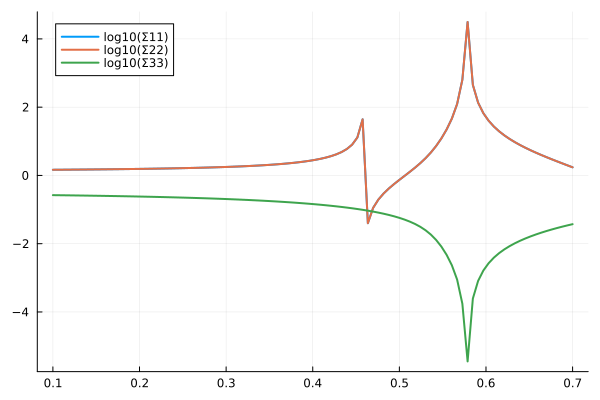

In [31]:
signed_log10(x) = x == 0 ? 0 : sign(x) * log10(abs(x))

plot(ϕ_vals, [signed_log10(Σ) for Σ in Σ11_vals], label="log10(Σ11)", lw=2)
plot!(ϕ_vals, [signed_log10(Σ) for Σ in Σ22_vals], label="log10(Σ22)", lw=2)
plot!(ϕ_vals, [signed_log10(Σ) for Σ in Σ33_vals], label="log10(Σ33)", lw=2)